In [9]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

In [10]:
# Replace 'filename.csv' with the path to your CSV file
bitcoin_history = '300000/Crypto/BTC_INR_synthetic_historical_data.csv'

# Read the CSV file into a DataFrame
bitcoin = pd.read_csv(bitcoin_history)

# Print the DataFrame
bitcoin = bitcoin['Open']

# ---------------------------------------------

# Replace 'filename.csv' with the path to your CSV file
etheruem_history = '300000/Crypto/ETH_INR Synthetic Historical Data.csv'

# Read the CSV file into a DataFrame
etheruem = pd.read_csv(etheruem_history)

# Print the DataFrame
etheruem = etheruem['Open']

# ---------------------------------------------

# Replace 'filename.csv' with the path to your CSV file
bnb_history = '300000/Crypto/BNB_INR Bitbns Historical Data.csv'

# Read the CSV file into a DataFrame
bnb = pd.read_csv(bnb_history)

# Print the DataFrame
bnb = bnb['Open']

# ---------------------------------------------

# Replace 'filename.csv' with the path to your CSV file
solana_history = '300000/Crypto/SOL_INR Bitbns Historical Data.csv'

# Read the CSV file into a DataFrame
solana = pd.read_csv(solana_history)

# Print the DataFrame
solana = solana['Open']

# ---------------------------------------------

# Replace 'filename.csv' with the path to your CSV file
shibu_history = '300000/Crypto/SHIB_INR Bitbns Historical Data.csv'

# Read the CSV file into a DataFrame
shibu = pd.read_csv(shibu_history)

# Print the DataFrame
shibu = shibu['Open']

shibu.dtype

dtype('float64')

In [11]:
bitcoin = bitcoin.astype(int)

etheruem = etheruem.astype(int)

bnb = bnb.astype(int)

solana = solana.astype(int)

shibu = shibu.astype(int)

In [12]:
# Calculate mean and variance of Bitcoin
mean_values = np.mean(bitcoin, axis=0)
variance_values = np.var(bitcoin, axis=0)

print("\nMean of numeric columns:")
print(mean_values)

print("\nVariance of numeric columns:")
print(variance_values)


Mean of numeric columns:
3712764.907019143

Variance of numeric columns:
5605172219556.623


In [13]:
# Calculate mean and variance of Ehteruem
mean_values = np.mean(etheruem, axis=0)
variance_values = np.var(etheruem, axis=0)

print("\nMean of numeric columns:")
print(mean_values)

print("\nVariance of numeric columns:")
print(variance_values)


Mean of numeric columns:
172233.4165907019

Variance of numeric columns:
5246497218.2941065


In [14]:
# Calculate mean and variance of BNB
mean_values = np.mean(bnb, axis=0)
variance_values = np.var(bnb, axis=0)

print("\nMean of numeric columns:")
print(mean_values)

print("\nVariance of numeric columns:")
print(variance_values)


Mean of numeric columns:
35677.56882406563

Variance of numeric columns:
110071532.94535471


In [15]:
# Calculate mean and variance of Solana
mean_values = np.mean(solana, axis=0)
variance_values = np.var(solana, axis=0)

print("\nMean of numeric columns:")
print(mean_values)

print("\nVariance of numeric columns:")
print(variance_values)


Mean of numeric columns:
7374.410209662717

Variance of numeric columns:
27669329.68769885


In [16]:
# Calculate mean and variance of Shibu
mean_values = np.mean(shibu, axis=0)
variance_values = np.var(shibu, axis=0)

print("\nMean of numeric columns:")
print(mean_values)

print("\nVariance of numeric columns:")
print(variance_values)


Mean of numeric columns:
0.0

Variance of numeric columns:
0.0


In [23]:
# Merging all Crypto Currencies in a DataFrame

df = pd.DataFrame({'bitcoin':bitcoin, 'etheruem': etheruem, 'solana':solana})
df

,bitcoin,etheruem,solana
0,90548,2166,11906
1,89485,2124,11443
2,87129,2071,11527
3,89824,2237,12668
4,90210,2221,12212
...,...,...,...
1092,2220789,119720,2896
1093,2274131,130012,3157
1094,2343419,139090,3370
1095,2347694,139292,3261


In [24]:
# 1. Calculate log returns
log_returns = np.log(df / df.shift(1)).dropna()

print(log_returns)

# 2. Calculate mean returns and covariance matrix
mean_returns = log_returns.mean()

print(mean_returns)

cov_matrix = log_returns.cov()

print(cov_matrix)

# 3. Number of assets
num_assets = len(mean_returns)

print(num_assets)

# 4. Initial weights guess (equal weight)
initial_weights = np.array([1/num_assets] * num_assets)
# initial_weights = np.array([.5,.2,.15,.15])

print(initial_weights)

       bitcoin  etheruem    solana
1    -0.011809 -0.019581 -0.039664
2    -0.026681 -0.025270  0.007314
3     0.030462  0.077104  0.094387
4     0.004288 -0.007178 -0.036660
5     0.000898  0.001799  0.036502
...        ...       ...       ...
1092  0.065611  0.065408  0.089904
1093  0.023735  0.082471  0.086292
1094  0.030013  0.067494  0.065291
1095  0.001823  0.001451 -0.032879
1096  0.029480  0.010896  0.014310

[1096 rows x 3 columns]
bitcoin     0.002997
etheruem    0.003809
solana     -0.001169
dtype: float64
           bitcoin  etheruem    solana
bitcoin   0.290748  0.290852 -0.000142
etheruem  0.290852  0.291363  0.000082
solana   -0.000142  0.000082  0.002954
3
[0.33333333 0.33333333 0.33333333]


In [25]:
# 5. Risk-free rate (e.g. 2% per annum)
risk_free_rate = 0.0675

# 6. Define the negative Sharpe Ratio function
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, mean_returns) * 252  # annualized
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # annualized
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio  # we minimize negative Sharpe

# 7. Constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# 8. Bounds: no short selling, so weights between 0 and 1
bounds = tuple((0, 1) for _ in range(num_assets))

# 9. Run optimization
result = minimize(
    neg_sharpe_ratio,
    initial_weights,
    args=(mean_returns, cov_matrix, risk_free_rate),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

In [26]:
# 10. Output results
optimal_weights = result.x
print("\nOptimal Weights:")
for asset, weight in zip(df.columns, optimal_weights):
    print(f"{asset}: {weight:.4f}")

# Optional: Portfolio stats
opt_return = np.dot(optimal_weights, mean_returns) * 252
opt_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix * 252, optimal_weights)))
opt_sharpe = (opt_return - risk_free_rate) / opt_volatility

print(f"\nExpected Annual Return: {opt_return:.2%}")
print(f"Annual Volatility: {opt_volatility:.2%}")
print(f"Sharpe Ratio: {opt_sharpe:.2f}")



Optimal Weights:
bitcoin: 0.0000
etheruem: 1.0000
solana: 0.0000

Expected Annual Return: 95.99%
Annual Volatility: 856.88%
Sharpe Ratio: 0.10


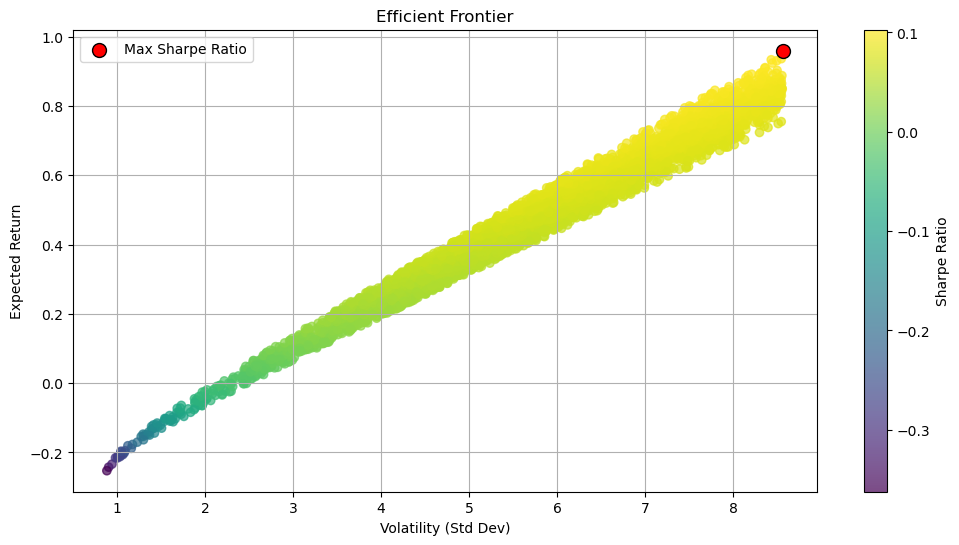

In [27]:
import matplotlib.pyplot as plt

# 1. Generate random portfolios
num_portfolios = 5000
results = np.zeros((3, num_portfolios))  # Rows: returns, volatility, Sharpe

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    portfolio_return = np.dot(weights, mean_returns) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# 2. Plot Efficient Frontier
plt.figure(figsize=(12, 6))
plt.scatter(results[1], results[0], c=results[2], cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Std Dev)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

# 3. Highlight optimal portfolio
plt.scatter(opt_volatility, opt_return, c='red', s=100, edgecolors='black', label='Max Sharpe Ratio')
plt.legend()
plt.grid(True)
plt.show()